## **Import packages**


## **Load and visualize MNIST da   t  a**


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage import measure

import warnings
warnings.filterwarnings("ignore") # Added this at the end to show a clean output with no warnings but not necessary 

### Choose number to visualize (from 0 to 9):

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
number = 0
x = x_train[y_train==number,:,:]
print('The shape of x is:')
print(x.shape)
print('which means:')
print('Number '+str(number)+' has '+str(x.shape[0])+' images of size '+str(x.shape[1])+'x'+str(x.shape[2]))

The shape of x is:
(5923, 28, 28)
which means:
Number 0 has 5923 images of size 28x28


### Plot average image:

Text(0.5, 1.0, 'Thresholded image')

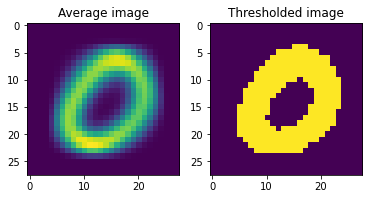

In [6]:
m = np.mean(x, axis=0) # IMPORTANT: indexes in python start at "0", not "1", so the first element of array "a" would be a[0]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(m)
plt.title('Average image')

mt = 1*(m > 60) # Thresholding
plt.subplot(1,2,2)
plt.imshow(mt)
plt.title('Thresholded image')

## From a thresholded image, we can use the regionprops function from skimage.measure

In [7]:
mt_props = measure.regionprops(mt)
num_regions = len(mt_props)
print(str(num_regions)+' region/s were found')
print('')

print('Area (in pixels):')
area = mt_props[0].area # Remember, index 0 is the first region found
print(area)
print('')

print('Perimeter (in pixels):')
perimeter = mt_props[0].perimeter
print(perimeter)
print('')

print('Centroid (pixel coordinates):')
centroid = mt_props[0].centroid
print(centroid)

print('Eccentricity:')
eccentricity = mt_props[0].eccentricity
print(eccentricity)
print('')

print('Minor axis length:')
minor_axis = mt_props[0].minor_axis_length
print(minor_axis)
print('')



1 region/s were found

Area (in pixels):
237

Perimeter (in pixels):
93.7401153701776

Centroid (pixel coordinates):
(13.978902953586498, 14.080168776371307)
Eccentricity:
0.6181813464414365

Minor axis length:
18.53176476195907



## Example: Scatter plot of Area vs Perimeter for all images of numbers "number" and "number+1"
### Are "Area" and "Perimeter" good features to classify "number" and "number+1"?

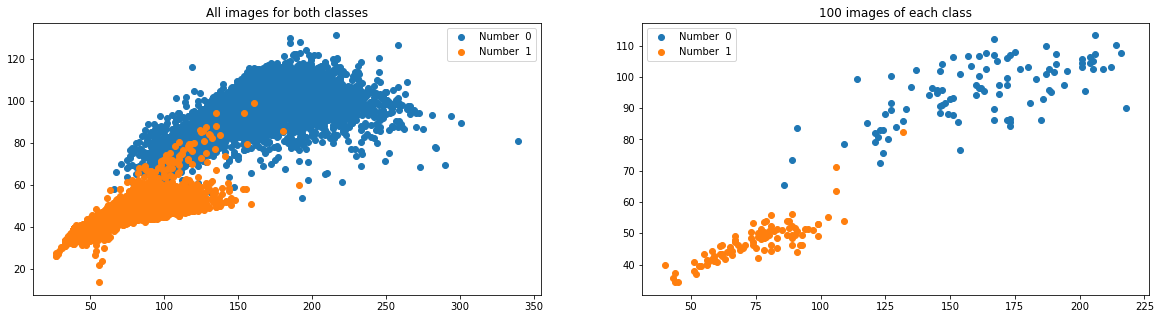

In [8]:

number = 0

x5 = x_train[y_train==number,:,:]
x6 = x_train[y_train==number+1,:,:]
buf5 = "Number  %d" % number
buf6 = "Number  %d" % (number+1)
# Threshold images
t5 = 1*(x5 > 60)
t6 = 1*(x6 > 60)

# Region properties
area5 = np.zeros(t5.shape[0])
perimeter5 = np.zeros(t5.shape[0])
for i in range(0,t5.shape[0]):
  props = measure.regionprops(t5[i,:,:])
  area5[i] = props[0].area
  perimeter5[i] = props[0].perimeter
  
area6 = np.zeros(t6.shape[0])
perimeter6 = np.zeros(t6.shape[0])
for i in range(0,t6.shape[0]):
  props = measure.regionprops(t6[i,:,:])
  area6[i] = props[0].area
  perimeter6[i] = props[0].perimeter
  
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(area5,perimeter5, label=buf5)
plt.scatter(area6,perimeter6, label=buf6)
plt.title('All images for both classes')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(area5[0:100],perimeter5[0:100], label=buf5)
plt.scatter(area6[0:100],perimeter6[0:100], label=buf6)
plt.title('100 images of each class')
plt.legend()

Fisher Discriminant Analysis

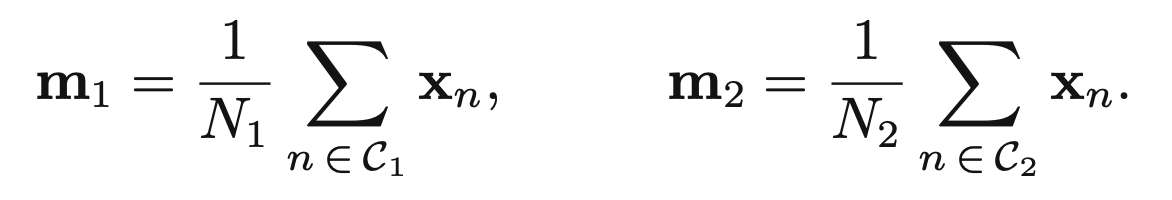

In [12]:
from IPython import display
display.Image('/Users/anasputhawala/Desktop/Screenshot 2022-11-09 at 10.07.38 PM.png')

In [39]:
area0 = area5
area1 = area6
perim0 = perimeter5
perim1 = perimeter6

In [41]:
areas = np.concatenate((area0, area1))
perims = np.concatenate((perim0, perim1))

In [42]:
t5

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

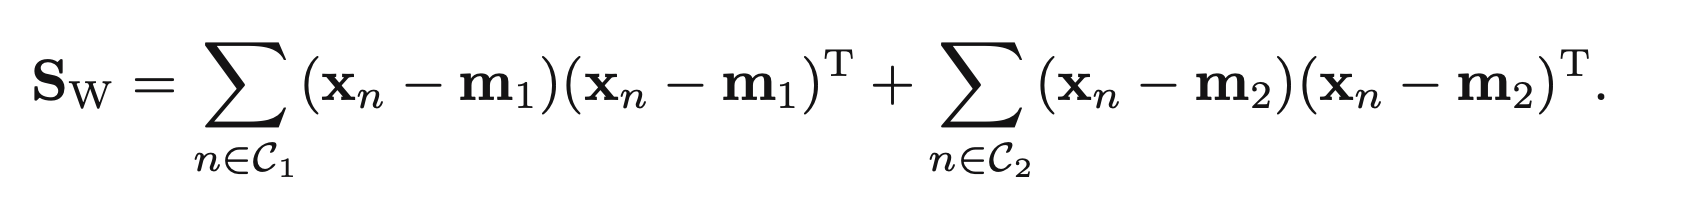

In [15]:
display.Image('/Users/anasputhawala/Desktop/Sw.png')

In [31]:
Sw = np.dot((area5-m1) , (area5-m1).T) + np.dot((area6-m2), (area6-m2).T)
Sw

9118674.323619347

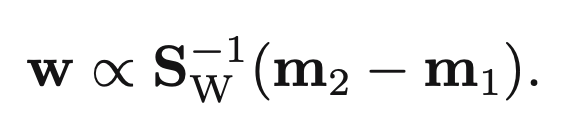

In [29]:
display.Image('/Users/anasputhawala/Desktop/sw2.png')

In [33]:
W = (1/Sw) * (m2 - m1)
W

-9.865195200662435e-06